In [1]:
from siffpy import SiffReader
from sifftrac.ros import find_experiment_containing_timestamp, Experiment
from siffroi import load_rois
from pathlib import Path

# Deeply ashamed for you to see my manual addition and removal loading files
# to check which ones had bad movement artifacts etc.

#filename = '/Users/stephen/Desktop/Data/imaging/2023-12-21/NP2_GRABDA3m_THLexA_LTrp/Fly1/FirstTry_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2023-12-22/NP2719_GRABDA3m_TH_LexA/Fly2/FirstTry_1.siff'

#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_TrpA1/Fly4/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly1/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly2/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly3/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly4/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly5/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-21/NP2_GRABDA3m_THLexA_LTrp/fly8/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly1/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly3/TemperatureControl_2.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly3/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly4/ZoomedOut_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly5/ZoomedOut_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-05/NP2GRABDA3m_THL_LTrpA1/Fly6/ZoomedOut_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_GRABDA3m_THLexA_LTrp/Fly1/TemperatureControl_1.siff'


#filename = '/Users/stephen/Desktop/Data/imaging/2023-12-29/NP2_GRABDA3m_THL/Fly1/DASequence_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2023-12-29/NP2_GRABDA3m_THL/Fly2/DASequence_1.siff'
filename = '/Users/stephen/Desktop/Data/imaging/2023-12-29/NP2_GRABDA3m_THL/Fly3/DASequence_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly1/DARamps_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly2/DARamps_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly3/DARamps_1.siff'


#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly1/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly2/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-01-14/NP2_GRABDA3m_THLexA_WT/Fly3/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_GRABDA3m_THLexA/Fly2/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_GRABDA3m_THLexA/Fly4/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_GRABDA3m_THLexA/Fly5/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_GRABDA3m_THLexA/Fly6/TemperatureControl_1.siff'

#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_Camui_XXM_TH_LexA_LTrp/Fly1/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_Camui_XXM_TH_LexA_LTrp/Fly1/TemperatureControlHighIntensity_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_Camui_XXM_TH_LexA_LTrp/Fly2/TemperatureControl_1.siff'
#filename = '/Users/stephen/Desktop/Data/imaging/2024-02-13/NP2719_Camui_XXM_TH_LexA_LTrp/Fly2/TemperatureControlHighIntensity_1.siff'

#filename = '/Users/stephen/Desktop/Data/imaging/2023-12-20/NP2_GRABDA3m_TH_L/Fly2/ROI2_Back_to_saline_1.siff'
sr = SiffReader(
    filename
)

print("Siff file opened")

tzero = sr.time_zero

exp = find_experiment_containing_timestamp(
    sr.filename.parent.parent.parent,
    tzero
)

print("Experiment found")

# Directory matches regex epxression where directory starts with sr.filename
pattern = str(sr.filename.stem) + '/*'
rois = load_rois(sr.filename.parent / sr.filename.stem)

print ("ROIs loaded")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/stephen/mambaforge/envs/siffpy/lib/python3.9/site-packages/siffpy/core/siffreader.py:210: RankWarning: Polyfit may be poorly conditioned
  return self.get_time(frames = framelist, reference_time = reference_time)
                    No git state file found for /Users/stephen/Desktop/Data/imaging/2023-12-29/2023_12_29/behavior_rig_experiment_02/behavior_rig_experiment_02_20231229_164219_warner_temp_control/read_temperature.csv.

                    Cannot guarantee compatibility with the data.
                
                Unable to validate configuration file and store parameters.
                Exception: 

                


Siff file opened
Experiment found
ROIs loaded


In [2]:
from siffplot.sifftrac.events import add_event_axis_matplotlib
from siffplot.siffpy import plot_siff_events
from siffplot.sifftrac import plot_temperature
from matplotlib import pyplot as plt
import numpy as np

t_axis = sr.t_axis(reference_time='epoch')

fluorescence = sr.get_frames(frames = sr.im_params.flatten_by_timepoints()).astype(float).reshape(sr.im_params.array_shape).squeeze()

#flim_trace = sr.sum_mask_flim(sr.flim_params[0], np.ones(sr.im_params.volume).squeeze().astype(bool))
flim_trace = sr.sum_mask_flim(sr.flim_params[0], rois[0].mask if len(rois) > 0 else np.ones(sr.im_params.volume).squeeze().astype(bool), )
flim_trace.convert_units('nanoseconds')

flim_trace_blurred = np.convolve(
    flim_trace,
    np.ones(int(1.0/sr.dt_frame)).astype(float)/(int(1.0/sr.dt_frame)),
    mode='same'
)

/var/folders/qw/jcn0_tjj2k588jc5gxt7sly40000gn/T/ipykernel_74968/1443528986.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  tmp_f.tight_layout()


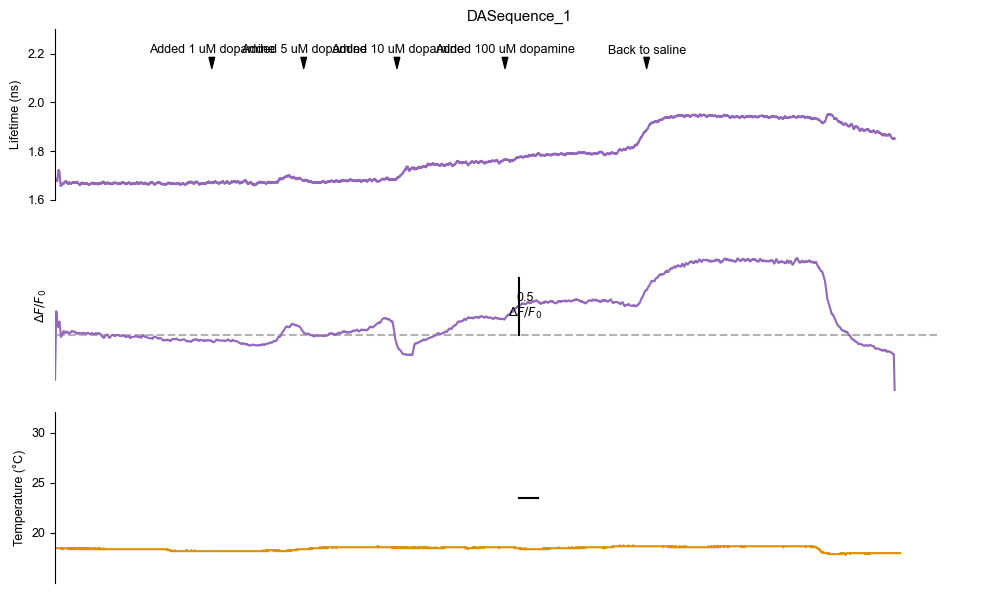

In [4]:
BRIGHT_VIOLET = '#9467bd'
from matplotlib import rcParams
rcParams['font.size'] = 9
rcParams['font.family'] = 'Arial'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


[stamp.timestamp_epoch for stamp in sr.get_appended_text()]

tmp_f, tmp_x = plt.subplots(nrows = 3, sharex = True, figsize = (3,0.5))

tmp_f.set_size_inches(4,1)

tmp_x[0].plot((t_axis - sr.time_zero)/1e9, flim_trace_blurred.lifetime, color = BRIGHT_VIOLET)
tmp_x[0].set_ylabel('Lifetime (ns)')

fo = flim_trace_blurred.intensity[int(5/sr.dt_frame):int(35/sr.dt_frame)].mean()
f = flim_trace_blurred.intensity

dfof = (f-fo)/fo

tmp_x[1].plot((t_axis - sr.time_zero)/1e9, dfof, color = BRIGHT_VIOLET)
tmp_x[1].set_ylabel(r'$\Delta F/F_0$')

tmp_x[1].plot(
    tmp_x[1].get_xlim(),
    [0,0],
    color = 'k',
    linestyle = '--',
    alpha = 0.3,
    zorder = -1
)

event_x = add_event_axis_matplotlib(tmp_f, tmp_x[0], location = 'top')

imaging_xlim = tmp_x[0].get_xlim()

plot_siff_events(sr, event_x, sr.time_zero)
event_x.set_xlim(0, imaging_xlim[1])

plot_temperature(exp.warner_temperature, tmp_x[2], sr.time_zero, )
tmp_x[2].set_xlim(*imaging_xlim)
tmp_x[2].set_ylim(15, 32)

tmp_x[0].set_ylim(1.6, 2.3)
tmp_x[1].set_ylim(-0.5,1.0)


tmp_f.set_size_inches(10,6)

#tmp_x[-1].set_xlabel('Time (s)')
#tmp_x[-1].set_xticks([(t_axis[0]- tzero)/1e9, (t_axis[-1] - tzero)/1e9])
tmp_x[-1].set_xlim(0, tmp_x[0].get_xlim()[1])

# for xax in tmp_x:
#     xax.spines['top'].set_visible(False)
#     xax.spines['right'].set_visible(False)
#     xax.spines['bottom'].set_visible(False)

tmp_x[-1].plot(
    [np.mean(tmp_x[2].get_xlim()), np.mean(tmp_x[2].get_xlim())+60],
    [np.mean(tmp_x[2].get_ylim()), np.mean(tmp_x[2].get_ylim())],
    color = 'k'
)

tmp_x[0].set_title(sr.filename.stem)

for x in tmp_x:
    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    x.spines['bottom'].set_visible(False)
    x.set_xticks([])

tmp_x[1].set_yticks([])
tmp_x[1].spines['left'].set_visible(False)
tmp_x[1].plot(
    [np.mean(tmp_x[2].get_xlim()), np.mean(tmp_x[2].get_xlim())],
    [0, 0.5],
    color = 'k'
)
tmp_x[1].text(
    np.mean(tmp_x[2].get_xlim())+20,
    0.25,
    '0.5\n$\Delta F/F_0$',
    ha = 'center',
    va = 'center'
)

tmp_f.tight_layout()

# from pathlib import Path
# if ~((test_path := Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/{sr.filename.parent.stem}')).exists()):
#     test_path.mkdir(exist_ok = True)

# tmp_f.savefig(
#     f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/bath_da.pdf',
#     bbox_inches = 'tight'
# )

In [5]:
crop_temp = exp.warner_temperature.temperature[(exp.warner_temperature.timestamps > sr.time_zero) * (exp.warner_temperature.timestamps < t_axis[-1])].values
crop_t = exp.warner_temperature.timestamps[(exp.warner_temperature.timestamps > sr.time_zero) * (exp.warner_temperature.timestamps < t_axis[-1])].values
dt_temp = (exp.warner_temperature.timestamps[1] - exp.warner_temperature.timestamps[0])/1e9

temp_increasing = np.convolve(np.diff(crop_temp), np.ones(int(15/dt_temp)).astype(float)/int(15/dt_temp), mode='same')

temp_twodir = np.insert(np.convolve(np.diff(temp_increasing), np.ones(int(15/dt_temp)).astype(float)/int(15/dt_temp), mode='same'), 0,0)

increasing_start = np.where(
    (temp_increasing > (np.mean(temp_increasing) + np.std(temp_increasing))/2)
    & (temp_twodir > (np.mean(temp_twodir) + np.std(temp_twodir)))
)[0][0]

increasing_end = np.where(
    (temp_increasing > (np.mean(temp_increasing) + np.std(temp_increasing))/2)
    & (temp_twodir < (np.mean(temp_twodir) - np.std(temp_twodir))) &
    (np.arange(len(temp_twodir)) > increasing_start)
)[0][0]

decreasing_start = np.where(
    (temp_increasing < (np.mean(temp_increasing) - np.std(temp_increasing))/2)
    & (temp_twodir < (np.mean(temp_twodir) - np.std(temp_twodir))/2)
    & (np.arange(len(temp_twodir)) > increasing_end)
)[0][0]

decreasing_end = np.where(
    (temp_increasing < (np.mean(temp_increasing) - np.std(temp_increasing))/2)
    & (temp_twodir > (np.mean(temp_twodir) + np.std(temp_twodir))/2)
    & (np.arange(len(temp_twodir)) > decreasing_start)
)[0][0]

inc_start_t, inc_end_t, dec_start_t, dec_end_t = crop_t[increasing_start], crop_t[increasing_end], crop_t[decreasing_start], crop_t[decreasing_end]

data= [
    np.mean(
        dfof[np.where((t_axis < inc_start_t) & (t_axis > (inc_start_t - 30*1e9)))[0]]
    ),
    np.mean(
        dfof[np.where((t_axis < dec_start_t) & (t_axis > inc_end_t))[0]]
    ),

    np.mean(
        flim_trace_blurred[np.where((t_axis < inc_start_t) & (t_axis > (inc_start_t - 30*1e9)))[0]]
    ).lifetime,

    np.mean(
        flim_trace_blurred[np.where((t_axis < dec_start_t) & (t_axis > inc_end_t))[0]]
    ).lifetime
]

if not (test_path := Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/')).exists():
    test_path.mkdir(exist_ok = True)

import pandas as pd
if 'Trp' in filename:
    savepath = test_path / 'summary_trp.xlsx'
else:
    savepath = test_path / 'summary_wt.xlsx'

if not savepath.exists():
    df = pd.DataFrame(
        columns = ['dfof_20', 'dfof_30', 'flim_20', 'flim_30']
    )
    df.loc[0] = data
else:
    df = pd.read_excel(savepath)

    df.loc[len(df)] = data

#df.to_excel(savepath, index = False)



In [ ]:
import pandas as pd

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,1.5))

df_together = pd.read_excel(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/')/ 'summary_trp.xlsx')

x_jit = np.random.normal(0, 0.03, len(df_together))
ax.plot(x_jit, df_together.flim_20, 'o', color = BRIGHT_VIOLET, alpha = 0.5, markersize = 4)

for x in range(len(df_together)):
    ax.plot([x_jit[x], 1+x_jit[x]], [df_together.flim_20[x], df_together.flim_30[x]], color = 'k', alpha = 0.5)

ax.plot(1+x_jit, df_together.flim_30, 'o', color = BRIGHT_VIOLET, alpha = 1.0, markersize = 4)

ax.plot([-0.15, 0.15], np.mean(df_together.flim_20)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [0,0],
    [
        np.mean(df_together.flim_20)-np.std(df_together.flim_20)/np.sqrt(len(df_together.flim_20)),
        np.mean(df_together.flim_20)+np.std(df_together.flim_20)/np.sqrt(len(df_together.flim_20))
    ], color = 'k', alpha = 1.0, linewidth = 3
)
ax.plot([0.85, 1.15], np.mean(df_together.flim_30)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [1,1],
    [
        np.mean(df_together.flim_30)-np.std(df_together.flim_30)/np.sqrt(len(df_together.flim_30)),
        np.mean(df_together.flim_30)+np.std(df_together.flim_30)/np.sqrt(len(df_together.flim_30))
    ], color = 'k', alpha = 1.0, linewidth = 3
)

df_together = pd.read_excel(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/')/ 'summary_wt.xlsx')

x_jit = 2+np.random.normal(0, 0.03, len(df_together))
ax.plot(x_jit, df_together.flim_20, 'o', color = '#000000', alpha = 0.5, markersize = 4)

for x in range(len(df_together)):
    ax.plot([x_jit[x], 1+x_jit[x]], [df_together.flim_20[x], df_together.flim_30[x]], color = 'k', alpha = 0.5)

ax.plot(1+x_jit, df_together.flim_30, 'o', color = '#000000', alpha = 1.0, markersize = 4)

ax.plot([1.85, 2.15], np.mean(df_together.flim_20)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [2,2],
    [
        np.mean(df_together.flim_20)-np.std(df_together.flim_20)/np.sqrt(len(df_together.flim_20)),
        np.mean(df_together.flim_20)+np.std(df_together.flim_20)/np.sqrt(len(df_together.flim_20))
    ], color = 'k', alpha = 1.0, linewidth = 3
)

ax.plot([2.85, 3.15], np.mean(df_together.flim_30)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)

ax.plot(
    [3,3],
    [
        np.mean(df_together.flim_30)-np.std(df_together.flim_30)/np.sqrt(len(df_together.flim_30)),
        np.mean(df_together.flim_30)+np.std(df_together.flim_30)/np.sqrt(len(df_together.flim_30))
    ], color = 'k', alpha = 1.0, linewidth = 3
)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
#ax.set_yticks([-0.5, 0, 0.5, 1.0])

fig.savefig(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/') / 'summary_plot_trp_flim.pdf')


In [ ]:
import pandas as pd

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (2,0.75))

df_together = pd.read_excel(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/')/ 'summary_trp.xlsx')

x_jit = np.random.normal(0, 0.03, len(df_together))
ax.plot(x_jit, df_together.dfof_20, 'o', color = BRIGHT_VIOLET, alpha = 0.5, markersize = 4)

for x in range(len(df_together)):
    ax.plot([x_jit[x], 1+x_jit[x]], [df_together.dfof_20[x], df_together.dfof_30[x]], color = 'k', alpha = 0.5)

ax.plot(1+x_jit, df_together.dfof_30, 'o', color = BRIGHT_VIOLET, alpha = 1.0, markersize = 4)

ax.plot([-0.15, 0.15], np.mean(df_together.dfof_20)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [0,0],
    [
        np.mean(df_together.dfof_20)-np.std(df_together.dfof_20)/np.sqrt(len(df_together.dfof_20)),
        np.mean(df_together.dfof_20)+np.std(df_together.dfof_20)/np.sqrt(len(df_together.dfof_20))
    ], color = 'k', alpha = 1.0, linewidth = 3
)
ax.plot([0.85, 1.15], np.mean(df_together.dfof_30)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [1,1],
    [
        np.mean(df_together.dfof_30)-np.std(df_together.dfof_30)/np.sqrt(len(df_together.dfof_30)),
        np.mean(df_together.dfof_30)+np.std(df_together.dfof_30)/np.sqrt(len(df_together.dfof_30))
    ], color = 'k', alpha = 1.0, linewidth = 3
)

df_together = pd.read_excel(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/')/ 'summary_wt.xlsx')

x_jit = 2+np.random.normal(0, 0.03, len(df_together))
ax.plot(x_jit, df_together.dfof_20, 'o', color = '#000000', alpha = 0.5, markersize = 4)

for x in range(len(df_together)):
    ax.plot([x_jit[x], 1+x_jit[x]], [df_together.dfof_20[x], df_together.dfof_30[x]], color = 'k', alpha = 0.5)

ax.plot(1+x_jit, df_together.dfof_30, 'o', color = '#000000', alpha = 1.0, markersize = 4)

ax.plot([1.85, 2.15], np.mean(df_together.dfof_20)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)
ax.plot(
    [2,2],
    [
        np.mean(df_together.dfof_20)-np.std(df_together.dfof_20)/np.sqrt(len(df_together.dfof_20)),
        np.mean(df_together.dfof_20)+np.std(df_together.dfof_20)/np.sqrt(len(df_together.dfof_20))
    ], color = 'k', alpha = 1.0, linewidth = 3
)

ax.plot([2.85, 3.15], np.mean(df_together.dfof_30)*np.ones(2), color = 'k', alpha = 1.0, linewidth = 3)

ax.plot(
    [3,3],
    [
        np.mean(df_together.dfof_30)-np.std(df_together.dfof_30)/np.sqrt(len(df_together.dfof_30)),
        np.mean(df_together.dfof_30)+np.std(df_together.dfof_30)/np.sqrt(len(df_together.dfof_30))
    ], color = 'k', alpha = 1.0, linewidth = 3
)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([-0.5, 0, 0.5, 1.0])

fig.savefig(Path(f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/') / 'summary_plot_trp.pdf')


In [ ]:
ex_f, ex_x = plt.subplots(ncols = 2, sharex = True, figsize = (10,6))

for ax in ex_x:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

cmapstr = 'Greys_r'

ex_x[0].imshow(
    (fluorescence[3000:3500].mean(axis=0)/sr.im_params.Scan2D.scanPixelTimeMean)[:240]*1e-6,
    cmap = cmapstr,
    vmin = 0.05,
    vmax = .75
)

ex_x[1].imshow(
    (fluorescence[6500:7000].mean(axis=0)/sr.im_params.Scan2D.scanPixelTimeMean)[:240]*1e-6,
    cmap = cmapstr,
    vmin = 0.05,
    vmax = 0.75
)

cb = ex_f.colorbar(
    plt.cm.ScalarMappable(
        cmap = cmapstr,
        norm = plt.Normalize(vmin = 0.05, vmax = .75)
    ),
    ax = ex_x,
    orientation = 'vertical',
    aspect = 20,
    label = 'Megaphotons per second'
)
cb.set_ticks([0.05, 0.75], labels = [r"$\leq 0.05$", r"$\geq 7.5$"])

ex_f.tight_layout()
ex_f.savefig(
    f'/Users/stephen/Documents/Manuscripts/Demotivation/Nat 2023 Review/Feb24/dopamine_imaging_data/{sr.filename.parent.stem}/{sr.filename.stem}_{cmapstr}.pdf',
    bbox_inches = 'tight'
)